# importing libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# loading dataset

In [3]:
df=pd.read_csv('Churn Modeling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [5]:
df.shape

(10000, 14)

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
pd.isnull(df).sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

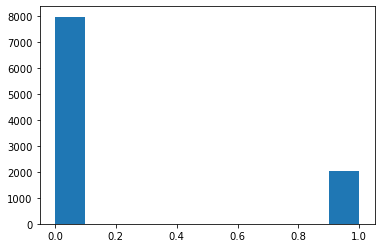

In [14]:
plt.hist(df['Exited'])

(array([810.,   0.,   0.,   0.,   0., 413.,   0.,   0.,   0., 814.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

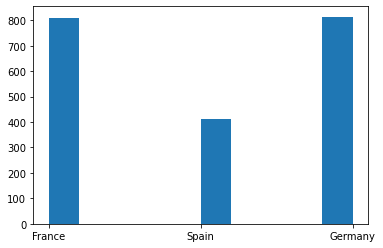

In [15]:
plt.hist(df[df['Exited']==1].Geography)

(array([2064.,    0.,    0.,    0.,    0., 4204.,    0.,    0.,    0.,
        1695.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

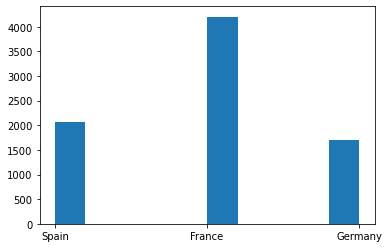

In [16]:
plt.hist(df[df['Exited']==0].Geography)

(array([5014.,    0.,    0.,    0.,    0., 2477.,    0.,    0.,    0.,
        2509.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

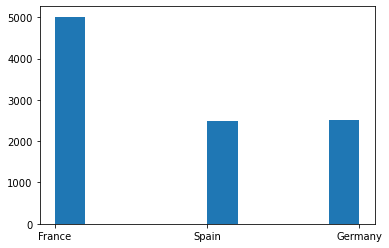

In [17]:
plt.hist(df['Geography'])

(array([ 565., 2012., 3156., 1309.,  381.,  254.,  150.,  113.,   19.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

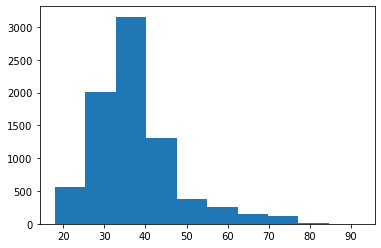

In [18]:
plt.hist(df[df['Exited']==0].Age)

(array([ 40., 141., 281., 531., 481., 357., 163.,  32.,  10.,   1.]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

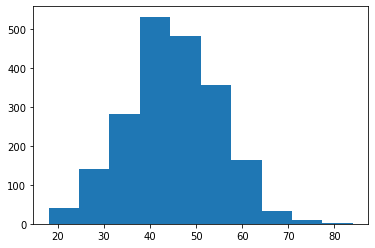

In [19]:
plt.hist(df[df['Exited']==1].Age)

(array([3404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4559.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

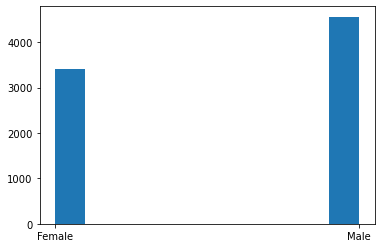

In [20]:
plt.hist(df[df['Exited']==0].Gender)

(array([1139.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         898.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

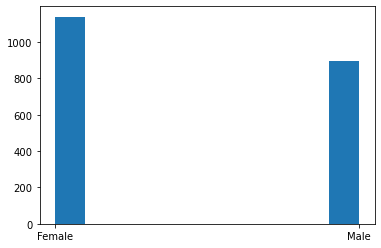

In [21]:
plt.hist(df[df['Exited']==1].Gender)

(array([ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
        1160.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

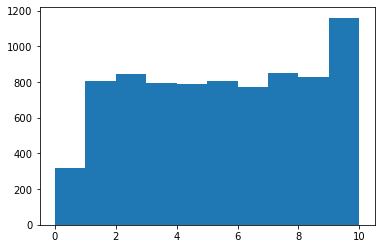

In [22]:
plt.hist(df[df['Exited']==0].Tenure)

(array([ 95., 232., 201., 213., 203., 209., 196., 177., 197., 314.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

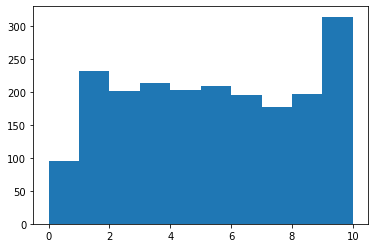

In [23]:
plt.hist(df[df['Exited']==1].Tenure)

In [24]:
age_exited_yes=df[df['Exited']==1].Age
age_exited_no=df[df['Exited']==0].Age

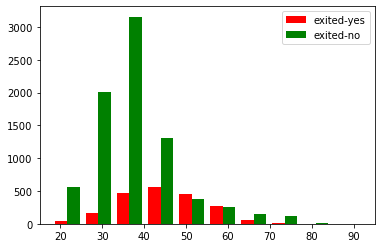

In [25]:
plt.hist([age_exited_yes,age_exited_no],color=['red','green'],label=['exited-yes','exited-no'])
plt.legend()

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# preprocessing

In [27]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df['Gender'].dtypes

dtype('int64')

In [30]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

# one hot encoding

In [31]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [32]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [33]:
df.drop('Geography_Germany',axis=1,inplace=True)

In [34]:
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


In [35]:
df.shape

(10000, 12)

In [36]:
df.dtypes

CreditScore           int64
Gender                int64
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
Geography_France      uint8
Geography_Spain       uint8
dtype: object

# scaling

In [37]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [92]:
X=df.drop('Exited',axis=1)
y=df.Exited

In [62]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# solving imbalance dataset problem using SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [39]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,1


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# splitting input data for testing and training

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=5,stratify=y_sm)

In [75]:
y_train.value_counts()

1    5574
0    5574
Name: Exited, dtype: int64

In [76]:
X_test.shape

(4778, 11)

In [77]:
y_test.shape

(4778,)

In [78]:
X_test[0:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain
12287,0.654355,1,0.228184,0.728129,0.385064,2,1,1,0.304073,0,1
6790,0.274000,0,0.297297,0.600000,0.542426,1,0,1,0.967077,0,1
8830,0.424000,0,0.283784,0.600000,0.520391,1,1,0,0.049220,0,0
2113,0.776000,1,0.229730,0.600000,0.405523,1,0,0,0.425910,0,0
5178,1.000000,1,0.054054,0.700000,0.364931,2,0,0,0.052654,0,0
13443,0.243620,1,0.392638,0.305522,0.517582,1,1,0,0.769850,0,0
5490,0.610000,0,0.810811,0.200000,0.000000,2,0,1,0.942209,0,1
1005,0.342000,1,0.459459,0.500000,0.464321,3,0,0,0.268933,0,0
8570,0.810000,0,0.135135,0.700000,0.496378,1,0,1,0.944287,1,0
3860,0.740000,0,0.216216,0.600000,0.441284,1,1,1,0.046939,1,0


In [79]:
y_test[0:10]

12287    1
6790     0
8830     1
2113     0
5178     0
13443    1
5490     0
1005     1
8570     0
3860     0
Name: Exited, dtype: int64

In [80]:
len(X_train.columns)

11

# training model

In [81]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
349/349 [==============================] - 4s 5ms/step - loss: 0.6939 - accuracy: 0.5442
Epoch 2/100
349/349 [==============================] - 2s 5ms/step - loss: 0.6092 - accuracy: 0.6678
Epoch 3/100
349/349 [==============================] - 2s 5ms/step - loss: 0.5750 - accuracy: 0.7048
Epoch 4/100
349/349 [==============================] - 2s 5ms/step - loss: 0.5623 - accuracy: 0.7193
Epoch 5/100
349/349 [==============================] - 2s 5ms/step - loss: 0.5510 - accuracy: 0.7288
Epoch 6/100
349/349 [==============================] - 2s 6ms/step - loss: 0.5402 - accuracy: 0.7370
Epoch 7/100
349/349 [==============================] - 2s 4ms/step - loss: 0.5333 - accuracy: 0.7413
Epoch 8/100
349/349 [==============================] - 2s 5ms/step - loss: 0.5170 - accuracy: 0.7482: 0s - loss: 0.515
Epoch 9/100
349/349 [==============================] - 1s 4ms/step - loss: 0.5209 - accuracy: 0.7422
Epoch 10/100
349/349 [==============================] - 1s 4ms/step - los

349/349 [==============================] - 2s 7ms/step - loss: 0.4456 - accuracy: 0.7818
Epoch 78/100
349/349 [==============================] - 2s 7ms/step - loss: 0.4342 - accuracy: 0.7880
Epoch 79/100
349/349 [==============================] - 3s 9ms/step - loss: 0.4286 - accuracy: 0.7952: 0s - loss: 0.4272 
Epoch 80/100
349/349 [==============================] - 2s 5ms/step - loss: 0.4509 - accuracy: 0.7809
Epoch 81/100
349/349 [==============================] - 2s 6ms/step - loss: 0.4428 - accuracy: 0.7889: 1s
Epoch 82/100
349/349 [==============================] - 2s 5ms/step - loss: 0.4339 - accuracy: 0.7916
Epoch 83/100
349/349 [==============================] - 1s 4ms/step - loss: 0.4380 - accuracy: 0.7885
Epoch 84/100
349/349 [==============================] - 1s 4ms/step - loss: 0.4330 - accuracy: 0.7959
Epoch 85/100
349/349 [==============================] - 2s 4ms/step - loss: 0.4431 - accuracy: 0.7905
Epoch 86/100
349/349 [==============================] - ETA: 0s - loss:

In [82]:
model.evaluate(X_test,y_test)

150/150 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.7811


[0.4451487362384796, 0.7810799479484558]

In [83]:
y_predicted=model.predict(X_test)

In [84]:
np.max(y_predicted)

0.99995816

In [85]:
yp=[]
for i in y_predicted:
    if i>0.5:
        yp.append(1)
    else:
        yp.append(0)

In [86]:
y_test[0:15]

12287    1
6790     0
8830     1
2113     0
5178     0
13443    1
5490     0
1005     1
8570     0
3860     0
6190     0
2881     0
10279    1
1962     1
6019     0
Name: Exited, dtype: int64

In [87]:
yp[0:15]

[0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

# classification report

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      2389
           1       0.76      0.81      0.79      2389

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



# confusion matrix

Text(69.0, 0.5, 'Truth')

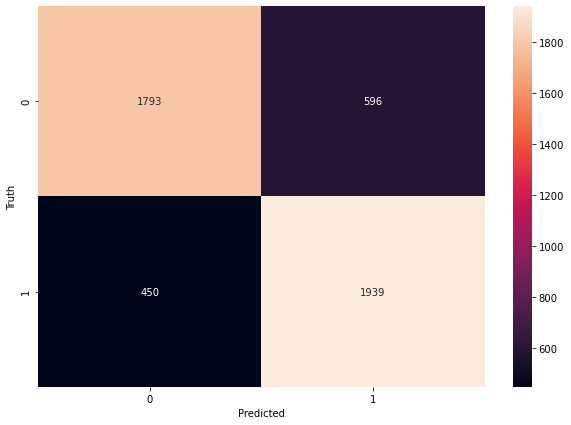

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=yp)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# accuracy

In [90]:
(1793+1939)/(1793+1939+450+596)

0.7810799497697781

In [91]:
model.evaluate(X_test,y_test)

150/150 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.7811


[0.4451487362384796, 0.7810799479484558]